## Data Science Intermedite I - TopCrowd Challenge

---

#### Instruction: Predict the target Age for each ID in the test set. The submission file should have a header and be formatted in a table as follows and include the Python code used 

##### Test Dataset - https://docs.google.com/spreadsheets/d/1YmpL9FUb36Em1omsA504_GlkO-C4uqo6A1vH7tpP5TQ/edit?usp=sharing

##### Train Dataset: https://docs.google.com/spreadsheets/d/1fY3V_nuNBqaHaNbeTmb-Dc99zWsh5_-Mmzsje8lpTH4/edit?usp=sharing

--- 

### This notebook is based on:

### I. Cleaning and visualization of the dataset.
### II. Predicting the ages of the entries with Machine Learning

---

### I. Cleaning and visualization of the dataset.

##### Importing all required libraries using Error Handling

In [18]:
try:
	import numpy as np # Numerical Computations
	import pandas as pd # Data Cleaning
	from matplotlib import pyplot as plt # Data Visualization
	import seaborn as sns # Data Visualization
	from sklearn.linear_model import LinearRegression, Lasso, Ridge
	from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
	from sklearn.neighbors import KNeighborsRegressor
	from sklearn.svm import SVR
	from sklearn.model_selection import train_test_split
	from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
	from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score



	# Adjust the display options
	pd.set_option('display.max_columns', 500)
	pd.set_option('display.max_rows', 500)

	# Suppress the unnecessary warnings
	import warnings
	warnings.simplefilter(action="ignore", category=FutureWarning)

except Exception as err:
	print(err)
	print()
	line = err.__traceback__.tb_lineno	# help on https://stackoverflow.com/a/65359924
	print(f'Check error issue value on line {err.__traceback__.tb_lineno}') # help on https://stackoverflow.com/a/65359924
	
	# Ensure there is access to the Internet
	if line == 2:
		%pip install numpy
		import numpy as np # Numerical Computations
	elif line == 3:
		%pip install pandas
		import pandas as pd # Data Visualization
	elif line == 4:
		%pip install matplotlib
		from matplotlib import pyplot as plt # Data Visualization
	elif line == 5:
		%pip install seaborn
		import seaborn as sns # Data Visualization
	else:
		%pip install -U scikit-learn
		from sklearn.linear_model import LinearRegression, Lasso, Ridge
		from sklearn.model_selection import train_test_split
		from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
		from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
%matplotlib inline

#### A. Data Cleaning

#### 1. Data Exploration - Exploring Video Games Sales Dataset for understanding

##### 1.1 Read in the dataset with pandas

In [19]:
df = pd.read_csv('./Train data.csv')
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
20186,20186,I,0.9250,0.7125,0.2375,7.271647,3.501163,1.757669,2.126212,8
20187,20187,F,1.5250,1.1875,0.4000,32.020760,14.132226,6.222715,8.363103,11
20188,20188,I,1.0750,0.7875,0.2375,10.716111,4.961163,2.267960,2.962523,7
20189,20189,M,1.4125,1.0750,0.3750,24.919210,11.708343,5.627376,6.038443,10


##### 1.2 Exploring the dataset structure

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20191 entries, 0 to 20190
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20191 non-null  int64  
 1   Sex             20191 non-null  object 
 2   Length          20191 non-null  float64
 3   Diameter        20191 non-null  float64
 4   Height          20191 non-null  float64
 5   Weight          20191 non-null  float64
 6   Shucked Weight  20191 non-null  float64
 7   Viscera Weight  20191 non-null  float64
 8   Shell Weight    20191 non-null  float64
 9   Age             20191 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 1.5+ MB


##### 1.3 Checking for undefined (NaN) values in the video games sales dataset

In [21]:
df.isna().sum() # Summing the undefined values

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

From the information above, there is no missing entry in the dataset

##### 1.4 Getting statistics on the dataset

In [22]:
df.describe(include='all')

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,20191.000000,20191,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10095.000000,NaN,1.317672,1.024637,0.348064,23.400403,10.121481,5.061241,6.724716,9.953246
std,5828.783978,NaN,0.288066,0.237790,0.093185,12.717732,5.644895,2.801545,3.599905,3.170614
min,0.000000,NaN,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,5047.500000,NaN,1.150000,0.887500,0.287500,13.437663,5.712424,2.849125,3.968930,8.000000
50%,10095.000000,NaN,1.375000,1.075000,0.362500,23.785231,9.908150,4.975337,6.803880,10.000000
75%,15142.500000,NaN,1.537500,1.200000,0.412500,32.318430,14.068439,7.002326,9.128539,11.000000


##### 1.5 Getting correlation information on the dataset

In [23]:
# df.corr()

The above cell would show an error given that a column has a String datatype which is the `Sex` column. 

The `Sex` column being a categorical column and the only object(string) column needs to be label-encoded so as to get correlations with other columns and also ease getting predictions

Steps:

1. LabelEncode the `Sex` column of our dataframe `df` and create a new column to take the encoding
2. Find correlation - df.corr() without adding the original `Sex` column and other unnecessary columns (e.g., `id`)

In [24]:
le = LabelEncoder()
labelenc_sex = le.fit_transform(df['Sex'])
df.insert(df.columns.get_loc('Sex')+1, 'SexValue', labelenc_sex)
df

,id,Sex,SexValue,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...,...
20186,20186,I,1,0.9250,0.7125,0.2375,7.271647,3.501163,1.757669,2.126212,8
20187,20187,F,0,1.5250,1.1875,0.4000,32.020760,14.132226,6.222715,8.363103,11
20188,20188,I,1,1.0750,0.7875,0.2375,10.716111,4.961163,2.267960,2.962523,7
20189,20189,M,2,1.4125,1.0750,0.3750,24.919210,11.708343,5.627376,6.038443,10


In [25]:
# Dropping unnecessary columns and finding correlations with a dataframe copy
df2 = df.drop(columns=['Sex','id'])
df2.corr()

,SexValue,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
SexValue,1.000000,-0.017893,-0.019113,-0.026017,-0.028815,-0.015053,-0.031838,-0.033171,-0.032150
Length,-0.017893,1.000000,0.989261,0.909915,0.936107,0.915552,0.918598,0.917170,0.618512
Diameter,-0.019113,0.989261,1.000000,0.913774,0.938894,0.914682,0.919822,0.923797,0.627650
Height,-0.026017,0.909915,0.913774,1.000000,0.892543,0.856741,0.874066,0.894293,0.633972
Weight,-0.028815,0.936107,0.938894,0.892543,1.000000,0.971409,0.970994,0.965972,0.607950
Shucked Weight,-0.015053,0.915552,0.914682,0.856741,0.971409,1.000000,0.943147,0.911186,0.511906
Viscera Weight,-0.031838,0.918598,0.919822,0.874066,0.970994,0.943147,1.000000,0.935042,0.582643
Shell Weight,-0.033171,0.917170,0.923797,0.894293,0.965972,0.911186,0.935042,1.000000,0.670578
Age,-0.032150,0.618512,0.627650,0.633972,0.607950,0.511906,0.582643,0.670578,1.000000


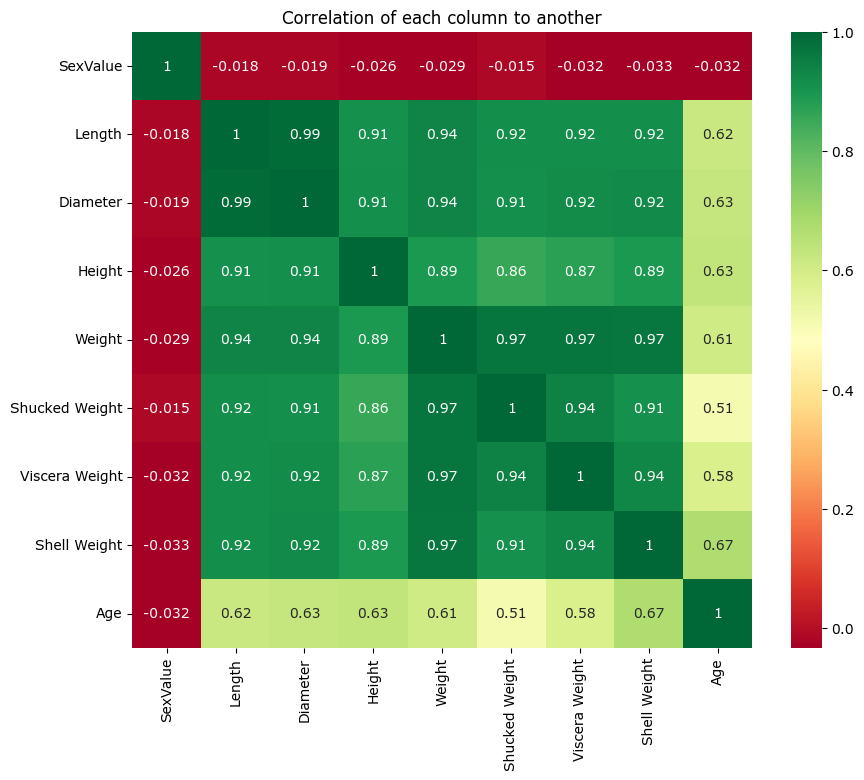

In [26]:
#### For a more representation of the correlation
corr_matrix = df2.corr()
top_corr_features = corr_matrix.index

plt.figure(figsize=(10,8))
plt.xticks(rotation = 90)
plt.title('Correlation of each column to another')
# Plotting a seaborn heat map for correlation
g=sns.heatmap(df2[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.savefig('correlation heatmap.png')

### II. Predicting the ages of the entries using Machine Learning Regression Models

1. Divide the dataset into features `X` and labels `y`

In [27]:
# Dividing and Splitting dataset

# Divide the dataset into features `X` and labels `y`
X = df2.drop(['Age'], axis=1) # input variables
y = df2['Age'] # output variables

2. Split the dataset into Train and Validation samples in the ratio 80:20 respectively.

In [28]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# y_train = np.reshape(y_train, (-1, 1))
# y_test = np.reshape(y_test, (-1, 1))
# y_train.shape

(16152, 1)

3. Scale the dataset for easy interpretation of data within same range by various models


In [30]:
# Scaling the dataset for easy interpretation of data within same range by various models

sscaler = StandardScaler()
scaler = MinMaxScaler()
sscaler.fit(X_train)
X_train = sscaler.transform(X_train)
X_test = sscaler.transform(X_test)

# y_train = sscaler.transform(y_train)
# y_test = sscaler.transform(y_test)

In [31]:
X_test

array([[ 1.16241136,  0.62967837,  0.62944199, ...,  0.64348902,
         0.60099702,  0.56952295],
       [-1.27182542,  0.62967837,  0.68193462, ...,  0.60846245,
         0.4446202 ,  0.53023494],
       [ 1.16241136,  0.54308134,  0.52445672, ...,  0.49337514,
         0.61613026,  0.2159308 ],
       ...,
       [ 1.16241136,  0.67297689,  0.78691989, ...,  1.14136672,
         0.40930931,  0.56952295],
       [-1.27182542,  1.06266353,  1.10187569, ...,  1.34902426,
         1.11552719,  1.11955519],
       [-0.05470703, -0.75587414, -0.63038121, ..., -0.72504918,
        -0.98799322, -0.84484566]])

4. Training the model using the training sets and different Regression models

	- Linear Regressor
	- Lasso Regressor
	- Ridge Regressor
	- RandomForest Regressor
	- KNeighbors Regressor
	- GradientBoosting Regressor
	- SupportVector Regressor

In [35]:
# Training the model using the training sets and different Regression models

# Linear Regression
lin_regressor = LinearRegression().fit(X_train, y_train)
# Predicting with fitted regressor
y_pred_lin = lin_regressor.predict(X_test)
print(y_pred_lin)
print(y_test)


# Lasso Regression
lass_regressor = Lasso(alpha=0.01).fit(X_train, y_train)
# Predicting with fitted regressor
y_pred_lass = lass_regressor.predict(X_test)
print(y_pred_lass)
print(y_test)

# Ridge Regression
ridge_regressor = Ridge().fit(X_train, y_train)
# Predicting with fitted regressor
y_pred_ridge = ridge_regressor.predict(X_test)
print(y_pred_ridge)
print(y_test)

# RandomForest Regression
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=2048)
rf_regressor.fit(X_train, y_train)
# Predicting with fitted regressor
y_pred_rf = rf_regressor.predict(X_test)
print(y_pred_rf)
print(y_test)

# KNeighbors Regression
kn_regressor = KNeighborsRegressor(n_neighbors=3, weights='distance').fit(X_train, y_train)
# Predicting with fitted regressor
y_pred_kn = kn_regressor.predict(X_test)
print(y_pred_kn)
print(y_test)

# GradientBoosting Regression
gb_regressor = GradientBoostingRegressor(n_estimators=50, random_state=2048).fit(X_train, y_train)
# Predicting with fitted regressor
y_pred_gb = gb_regressor.predict(X_test)
print(y_pred_gb)
print(y_test)

# SV Regression
sv_regressor = SVR(kernel='rbf').fit(X_train, y_train)
# Predicting with fitted regressor
y_pred_sv = sv_regressor.predict(X_test)
print(y_pred_sv)
print(y_test)

[[11.18324486]
 [10.69711655]
 [ 9.90051663]
 ...
 [ 9.61142523]
 [11.55861693]
 [ 8.01411121]]
[[10]
 [12]
 [10]
 ...
 [10]
 [12]
 [ 8]]


C:\Users\Oluchukwu Okoh\AppData\Local\Temp\ipykernel_15952\3492479053.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)
c:\Users\Oluchukwu Okoh\Desktop\sgiG\DiversiBoard\TopCoder\Data Science\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Oluchukwu Okoh\Desktop\sgiG\DiversiBoard\TopCoder\Data Science\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6. Selecting the best regressor out of all regressors considered above:

In [33]:
# Measuring model evaluation metrics - Mean Squared Error (MSE)
print("The Mean Squared Error for all the regressors\n")
print("Linear Regression MSE: ", mean_squared_error(y_test, y_pred_lin))
print("Lasso Regression MSE: ", mean_squared_error(y_test, y_pred_lass))
print("Ridge Regression MSE: ", mean_squared_error(y_test, y_pred_ridge))
print("Random Forest Regression MSE: ", mean_squared_error(y_test, y_pred_rf))
print("K Neighbors Regression MSE: ", mean_squared_error(y_test, y_pred_kn))
print("Gradient Boosting Regression MSE: ", mean_squared_error(y_test, y_pred_gb))
print("Support Vector Regression MSE: ", mean_squared_error(y_test, y_pred_sv))

# Measuring model evaluation metrics - R-Squared (R2)
print("\n")
print("Coefficient of determination for all the regressors\n")
print("Linear Regression R2: ", r2_score(y_test, y_pred_lin))
print("Lasso Regression R2: ", r2_score(y_test, y_pred_lass))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf))
print("K Neighbors Regression R2:", r2_score(y_test, y_pred_kn))
print("Gradient Boosting Regression R2:", r2_score(y_test, y_pred_gb))
print("Support Vector Regression R2:", r2_score(y_test, y_pred_sv))

The Mean Squared Error for all the regressors

Linear Regression MSE:  4.504684590398144
Lasso Regression MSE:  4.53658363134427
Ridge Regression MSE:  4.504893549120989
Random Forest Regression MSE:  4.393762498968392
K Neighbors Regression MSE:  5.5236024733209
Gradient Boosting Regression MSE:  4.2958053605029916
Support Vector Regression MSE:  4.341329232319581


Coefficient of determination for all the regressors

Linear Regression R2:  0.5443811032195758
Lasso Regression R2:  0.5411547273096604
Ridge Regression R2: 0.5443599684340288
Random Forest Regression R2: 0.5556001352986529
K Neighbors Regression R2: 0.44132433366979473
Gradient Boosting Regression R2: 0.5655078485832867
Support Vector Regression R2: 0.560903411615944


6. Getting the regression equation of the regressor that best estimates the output variable (Age) from the input variables.

In [ ]:
# Printing out coefficients and intercepts after training above
print('Coefficients of input variables: ', gb_regressor.coef_)
print()
print('Intercept of the fitting relationships: ', gb_regressor.intercept_)
print()


gb_coef = gb_regressor.coef_
gb_intercept = gb_regressor.intercept_

stringg = 'y = {:.3f}'
for i in X.columns:
	stringg +=  ' + {:.3f}*'
	stringg += i 

# 8 features exists in our dataset, hence we make use of zero-indexing to define our equation
gb_model = stringg.format(gb_intercept, gb_coef[0], gb_coef[1], gb_coef[2], gb_coef[3], gb_coef[4], gb_coef[5], gb_coef[6], gb_coef[7])

print('Linear Regression Model:', gb_model)

# Creating a dataframe to show the coefficients of the variables with correlation category
corr_df = pd.DataFrame(data=np.round(gb_coef, 4), index=X.columns).rename(columns={0:'Coefficients'})
corr_df.reset_index().rename(columns={'index':'Variables'})

In [ ]:
# Printing out coefficients and intercepts after training above
print('Coefficients of input variables: ', lin_regressor.coef_)
print()
print('Intercept of the fitting relationships: ', lin_regressor.intercept_)
print()


lin_coef = lin_regressor.coef_
lin_intercept = lin_regressor.intercept_

stringg = 'y = {:.3f}'
for i in X.columns:
	stringg +=  ' + {:.3f}*'
	stringg += i 

# 8 features exists in our dataset, hence we make use of zero-indexing to define our equation
linear_model = stringg.format(lin_intercept, lin_coef[0], lin_coef[1], lin_coef[2], lin_coef[3], lin_coef[4], lin_coef[5], lin_coef[6], lin_coef[7])

print('Linear Regression Model:', linear_model)

# Creating a dataframe to show the coefficients of the variables with correlation category
corr_df = pd.DataFrame(data=np.round(lin_coef, 4), index=X.columns).rename(columns={0:'Coefficients'})
corr_df.reset_index().rename(columns={'index':'Variables'})

### III. Predicting the ages of the entries using Machine Learning Classification Models

Given that Regression models didn't perform well based on the metrics above, let's try out classification models. 

This requires that our label column - `Age` should have a less nunber of unique values

In [43]:
df2['Age'].unique()

array([ 9,  8, 11, 10, 12,  7,  5, 14,  6, 13, 16,  4, 18, 15, 17,  3, 19,
       23, 21, 20, 26, 22, 27, 24, 25, 29,  2,  1], dtype=int64)

In [39]:
df2['Age'].nunique()

28

`28` is not a less number to be used as our classification output. Hence, let's use another method below:

### IV. Predicting the ages of the entries using Deep Learning Models

A. Trying out deep learning due to the low metrics and insights gotten from the different machine learning models

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.layers.normalization.batch_normalization import BatchNormalization

In [44]:
X

,SexValue,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
20186,1,0.9250,0.7125,0.2375,7.271647,3.501163,1.757669,2.126212
20187,0,1.5250,1.1875,0.4000,32.020760,14.132226,6.222715,8.363103
20188,1,1.0750,0.7875,0.2375,10.716111,4.961163,2.267960,2.962523
20189,2,1.4125,1.0750,0.3750,24.919210,11.708343,5.627376,6.038443
